In [1]:
%matplotlib qt
import mne
import matplotlib.pyplot as plt
import utils
import cleaner
from autoreject import AutoReject, get_rejection_threshold
from mne.preprocessing import create_eog_epochs, create_ecg_epochs
from autoreject import AutoReject


# mne.viz.set_3d_backend("notebook")


In [2]:
path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/'
file = 'VP09_crop_rMean_minmarker.set'

raw = mne.io.read_raw_eeglab(path+file, preload = True)


Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP09_crop_rMean_minmarker.fdt
Reading 0 ... 2210108  =      0.000 ...  4316.617 secs...


<ipython-input-2-6f0c6f34f258>:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path+file, preload = True)


In [11]:
print(raw.info)

raw.set_channel_types({'EXG3': 'eog', 'EXG4': 'eog', 'EXG5': 'eog','EXG6': 'eog'})

raw.info['bads'] = ['Pz', 'EXG1', 'EXG2', 'EXG7', 'EXG8']

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 72 EEG
 custom_ref_applied: False
 dig: 72 items (72 EEG)
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 72
 projs: []
 sfreq: 512.0 Hz
>


In [10]:
raw.plot()
plt.show()

Channels marked as bad: ['Pz', 'EXG1', 'EXG2', 'EXG7', 'EXG8']


# Preprocessing

- Channels: Rereferencez to Pz and Interpolated to 62 channels minus P9 and P10. Drop them
- Downsample: 250
- High pass: 0.5
- ICA

In [9]:
#downdsample
# raw_downsampled = raw.copy().resample(sfreq = 250)

## Filtering
### PSD:

In [13]:
raw.plot_psd(fmax = 250, xscale = 'linear')
plt.show()
raw.plot_psd(fmax = 100, xscale = 'log')
plt.show()

Effective window size : 4.000 (s)
Effective window size : 4.000 (s)


In [12]:
lfreq = 1 
hfreq = 40
raw.filter(lfreq, hfreq,
            filter_length='auto', phase='zero', fir_window='hamming',
            fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



<RawEEGLAB | VP09_crop_rMean_minmarker.fdt, 72 x 2210109 (4316.6 s), ~1.19 GB, data loaded>

# Data segmentation

- Epoch: -200 to 2400ms


In [5]:
events, event_dict = utils.make_correct_labels(raw)

Used Annotations descriptions: ['-999', '1', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '12', '154', '155', '157', '158', '160', '161', '162', '163', '165', '167', '169', '17', '170', '171', '172', '173', '174', '175', '177', '179', '181', '188', '192', '2', '201', '202', '203', '204', '205', '206', '207', '208', '232', '233', '234', '238', '239', '243', '251', '252', '253', '3', '4', '5', '6', '62', '68', '7', '74', '80', '86', '9', '92', '98', '99']


{'PC/on-task/go/correct/5': 11115,
 'PC/on-task/go/correct/4': 11114,
 'PC/on-task/go/correct/3': 11113,
 'PC/on-task/go/correct/2': 11112,
 'PC/on-task/go/correct/1': 11111,
 'PC/distracted/go/correct/5': 13115,
 'PC/distracted/go/correct/4': 13114,
 'PC/distracted/go/correct/3': 13113,
 'PC/distracted/go/correct/2': 13112,
 'PC/distracted/go/correct/1': 13111,
 'PC/on-task/nogo/correct/1': 11011,
 'SC/dMW/go/correct/5': 24115,
 'SC/dMW/go/correct/4': 24114,
 'SC/dMW/go/correct/3': 24113,
 'SC/dMW/nogo/incorrect/2': 24002,
 'SC/dMW/go/correct/1': 24111,
 'SC/dMW/go/correct/2': 24112,
 'SC/dMW/go/incorrect/1': 24101,
 'PC/about-task/go/correct/5': 12115,
 'PC/about-task/nogo/incorrect/4': 12004,
 'PC/about-task/go/incorrect/3': 12103,
 'PC/about-task/go/correct/2': 12112,
 'PC/about-task/go/correct/1': 12111,
 'SC/distracted/go/correct/5': 23115,
 'SC/distracted/go/correct/4': 23114,
 'SC/distracted/go/correct/3': 23113,
 'SC/distracted/go/correct/2': 23112,
 'SC/distracted/go/correct/

In [15]:
mne.viz.plot_events(events, event_id = event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)
plt.show()

<ipython-input-15-b941d5e1c09c>:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  first_samp=raw.first_samp)


In [13]:
#####EPOCHING#####
tmin, tmax = -0.8, 0.8
# rejection_criteria = dict(eeg = 100e-06)
epochs = mne.Epochs(raw, events = events, event_id= event_dict, baseline = (None,None),
                    tmin = tmin, tmax = tmax, picks = ('eeg', 'eog'), preload = True,
#                     reject = rejection_criteria, 
                    verbose = False)

In [14]:
ar = AutoReject()
epochs_clean = ar.fit_transform(epochs)  
reject = get_rejection_threshold(epochs)  

/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/autoreject/utils.py:66: UserWarning: 5 channels are marked as bad. These will be ignored. If you want them to be considered by autoreject please remove them from epochs.info["bads"].
  'remove them from epochs.info["bads"].' % n_bads)
Creating augmented epochs:   0%|          | 0/63 [00:00<?, ?it/s]

Running autoreject on ch_type=eeg


Computing thresholds ...: 100%|██████████| 63/63 [01:44<00:00,  1.66s/it]


Repairing epochs:   0%|          | 0/176 [00:00<?, ?it/s]

Repairing epochs:  14%|█▍        | 25/176 [00:00<00:00, 247.02it/s]

Repairing epochs:  28%|██▊       | 50/176 [00:00<00:00, 247.41it/s]

Repairing epochs:  43%|████▎     | 75/176 [00:00<00:00, 241.29it/s]

Repairing epochs:  57%|█████▋    | 100/176 [00:00<00:00, 230.62it/s]

Repairing epochs:  71%|███████   | 125/176 [00:00<00:00, 234.36it/s]

Repairing epochs:  85%|████████▌ | 150/176 [00:00<00:00, 237.80it/s]

Repairing epochs: 100%|██████████| 176/176 [00:00<00:00, 237.15it/s]

n_interp:   0%|          | 0/3 [00:00<?, ?it/s]

Repairing epochs:   0%|          | 0/176 [00:00<?, ?it/s]

Repairing epochs:   2%|▏         | 3/176 [00:00<00:07, 22.35it/s]

Repairing epochs:   3%|▎         | 6/176 [00:00<00:08, 19.63it/s]

Repairing epochs:   5%|▍         | 8/176 [00:00<00:08, 18.81it/s]

Repairing epochs:   6%|▌         | 10/176 [00:00<00:09, 18.20it/s]

R

Repairing epochs:  40%|████      | 71/176 [00:02<00:03, 34.93it/s]

Repairing epochs:  43%|████▎     | 75/176 [00:02<00:02, 33.74it/s]

Repairing epochs:  45%|████▍     | 79/176 [00:02<00:03, 26.70it/s]

Repairing epochs:  47%|████▋     | 82/176 [00:02<00:03, 27.36it/s]

Repairing epochs:  48%|████▊     | 85/176 [00:02<00:03, 25.63it/s]

Repairing epochs:  50%|█████     | 88/176 [00:02<00:03, 24.03it/s]

Repairing epochs:  52%|█████▏    | 91/176 [00:02<00:03, 23.02it/s]

Repairing epochs:  53%|█████▎    | 94/176 [00:03<00:03, 23.88it/s]

Repairing epochs:  56%|█████▌    | 98/176 [00:03<00:02, 27.63it/s]

Repairing epochs:  57%|█████▋    | 101/176 [00:03<00:02, 27.94it/s]

Repairing epochs:  60%|█████▉    | 105/176 [00:03<00:02, 30.02it/s]

Repairing epochs:  62%|██████▏   | 109/176 [00:03<00:02, 30.77it/s]

Repairing epochs:  64%|██████▍   | 113/176 [00:03<00:02, 29.81it/s]

Repairing epochs:  66%|██████▋   | 117/176 [00:03<00:01, 32.21it/s]

Repairing epochs:  69%|██████▉   | 121/176 

Fold:  90%|█████████ | 9/10 [00:05<00:00,  1.55it/s]


Fold: 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

n_interp: 100%|██████████| 3/3 [00:56<00:00, 18.70s/it]
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/autoreject/utils.py:66: UserWarning: 5 channels are marked as bad. These will be ignored. If you want them to be considered by autoreject please remove them from epochs.info["bads"].
  'remove them from epochs.info["bads"].' % n_bads)


Repairing epochs:   0%|          | 0/176 [00:00<?, ?it/s]





Estimated consensus=0.60 and n_interpolate=32




Repairing epochs:   3%|▎         | 5/176 [00:00<00:04, 38.74it/s]

Repairing epochs:   5%|▌         | 9/176 [00:00<00:05, 28.13it/s]

Repairing epochs:   7%|▋         | 12/176 [00:00<00:05, 27.96it/s]

Repairing epochs:   9%|▉         | 16/176 [00:00<00:05, 30.77it/s]

Repairing epochs:  11%|█▏        | 20/176 [00:00<00:05, 29.86it/s]

Repairing epochs:  14%|█▎        | 24/176 [00:00<00:05, 25.67it/s]

Repairing epochs:  15%|█▌        | 27/176 [00:01<00:06, 24.49it/s]

Repairing epochs:  17%|█▋        | 30/176 [00:01<00:06, 24.12it/s]

Repairing epochs:  19%|█▉        | 33/176 [00:01<00:06, 22.89it/s]

Repairing epochs:  20%|██        | 36/176 [00:01<00:07, 19.87it/s]

Repairing epochs:  22%|██▏       | 39/176 [00:01<00:08, 17.11it/s]

Repairing epochs:  23%|██▎       | 41/176 [00:01<00:08, 16.09it/s]

Repairing epochs:  25%|██▌       | 44/176 [00:01<00:07, 18.75it/s]

Repairing epochs:  27%|██▋       | 47/176 [00:02<00:06, 18.43it/s]

Repairing epochs:  28%|██▊       | 49/176 [00:02

Estimating rejection dictionary for eeg
Estimating rejection dictionary for eog


In [37]:
epochs_clean.save(fname = file + '-epo.fif' )

In [6]:
epochs.plot()
plt.show()

In [15]:
evoked_clean = epochs_clean.average()
evoked = epochs.average()

# set_matplotlib_defaults(plt)

fig, axes = plt.subplots(2, 1, figsize=(6, 6))

for ax in axes:
    ax.tick_params(axis='x', which='both', bottom='off', top='off')
    ax.tick_params(axis='y', which='both', left='off', right='off')

ylim = dict(grad=(-170, 200))
# evoked.pick_types(meg='grad', exclude=[])
evoked.plot(exclude=[], axes=axes[0], ylim=ylim, show=False)
axes[0].set_title('Before autoreject')
# evoked_clean.pick_types(meg='grad', exclude=[])
evoked_clean.plot(exclude=[], axes=axes[1], ylim=ylim)
axes[1].set_title('After autoreject')
plt.tight_layout()

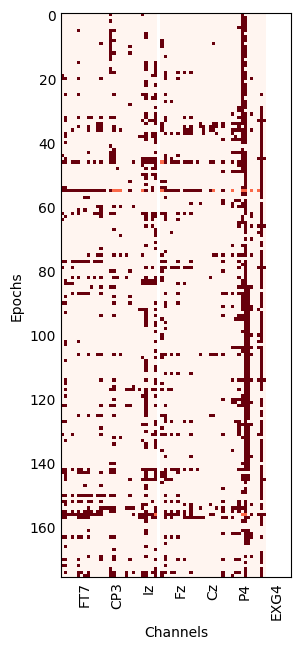

In [16]:
ar.get_reject_log(epochs).plot()

In [17]:
ica = mne.preprocessing.ICA(method='fastica')

ica.fit(epochs_clean, decim=1)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 63 components
Fitting ICA took 79.7s.


<ICA | epochs decomposition, fit (fastica): 143675 samples, 63 components, channels used: "eeg">

In [18]:
# ecg_epochs = create_ecg_epochs(raw, tmin=-.5, tmax=.5)
# ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, threshold='auto')

ica.plot_components()

[<Figure size 975x942 with 20 Axes>,
 <Figure size 975x942 with 20 Axes>,
 <Figure size 975x942 with 20 Axes>,
 <Figure size 585x235.5 with 3 Axes>]

In [19]:
ica.plot_properties(epochs_clean)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [39]:
%run /home/nicolas.bruno/eeg_cleaner/scripts/3_clean_ica.py --path='VP11_crop_rMean_trim10_modmarker6.set-epo.fif' --icaname='auto'

Started ICA cleaner
Creating ICA report
Reading VP11_crop_rMean_trim10_modmarker6.set-epo.fif ...
    Found the data of interest:
        t =    -800.78 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated


CalledProcessError: Command '['git', '-C', '/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/cleaner-0.1.dev0-py3.7.egg/cleaner', 'describe', '--always']' returned non-zero exit status 128.